In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
from scipy import interpolate
import scipy.stats as sts

In [3]:
data = pd.read_csv('vovchik.csv')

Text(0.5, 1.0, 'Экспериментальный сигнал')

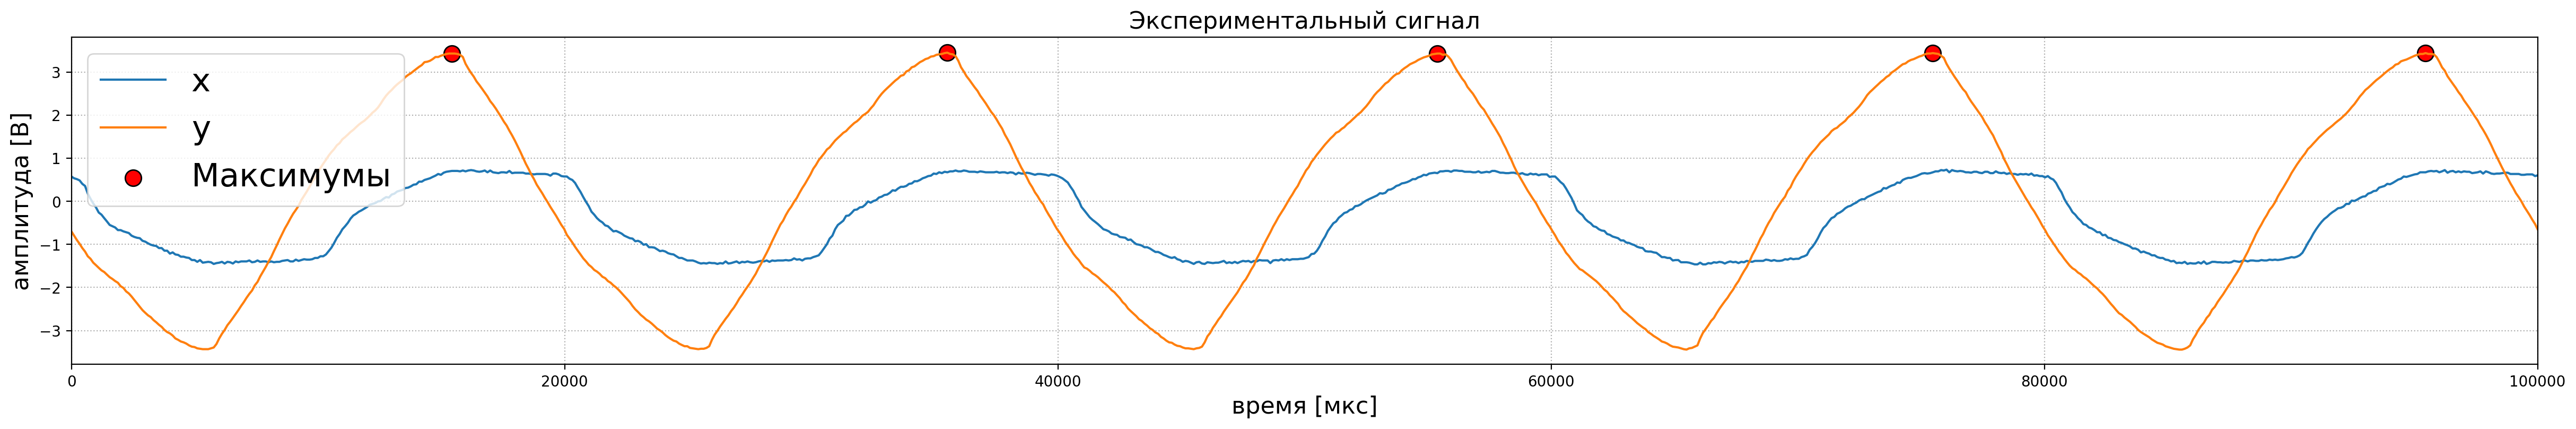

In [4]:
plt.figure(figsize=(30, 4), dpi = 200)
plt.plot(data.time[:1000], data.x[:1000], label = 'x')
plt.plot(data.time[:1000], data.y[:1000], label = 'y')
plt.xlabel("время [мкс]", fontsize = 16)
plt.ylabel("амплитуда [В]", fontsize = 16)
plt.grid(ls = ':')
maximums_index, _ = signal.find_peaks(data.y, height = 3, distance=100)
plt.scatter(data.time[maximums_index], data.y[maximums_index], color = 'red', s = 120, edgecolors='k', label = 'Максимумы')
plt.legend(fontsize = 22)
plt.xlim(0, 1e5)
plt.title("Экспериментальный сигнал", fontsize = 16)

180.3


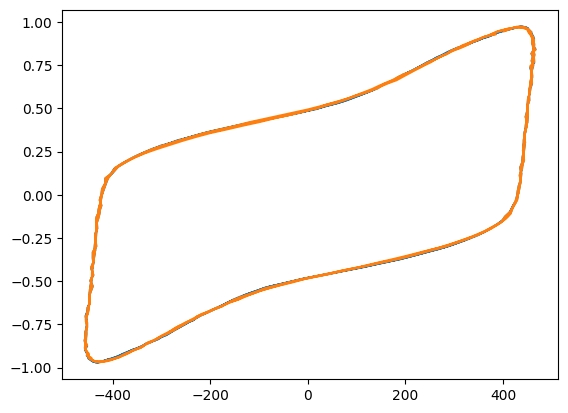

In [5]:
T = 180 * 3
print(np.mean(np.diff(maximums_index)))

x_normallized = data.x - np.mean(data.x)
H = x_normallized * 2.3 * np.sqrt(2) * 150/ np.max(x_normallized)
y_normallized = (data.y - np.mean(data.y))
y_normallized /= np.max(y_normallized)


x_arrs = [H[i:i+T] for i in np.arange(maximums_index[0], len(data.x) - 45 * T, T)]
y_arrs = [y_normallized[i:i+T] for i in np.arange(maximums_index[0], len(data.x) - 45 * T, T)]
# for i in range(5):
#     plt.plot(x_arrs[i], y_arrs[i])
x_mean_by_cycles = np.mean(x_arrs, axis = 0)
y_mean_by_cycles = np.mean(y_arrs, axis = 0)

indecies_line = np.arange(0, len(x_mean_by_cycles), 1)
s = 0.01
interpolation_x = interpolate.UnivariateSpline(indecies_line, x_mean_by_cycles, s = s)(indecies_line)
interpolation_y = interpolate.UnivariateSpline(indecies_line, y_mean_by_cycles, s = s)(indecies_line)

plt.plot(x_mean_by_cycles, y_mean_by_cycles)
plt.plot(interpolation_x, interpolation_y)

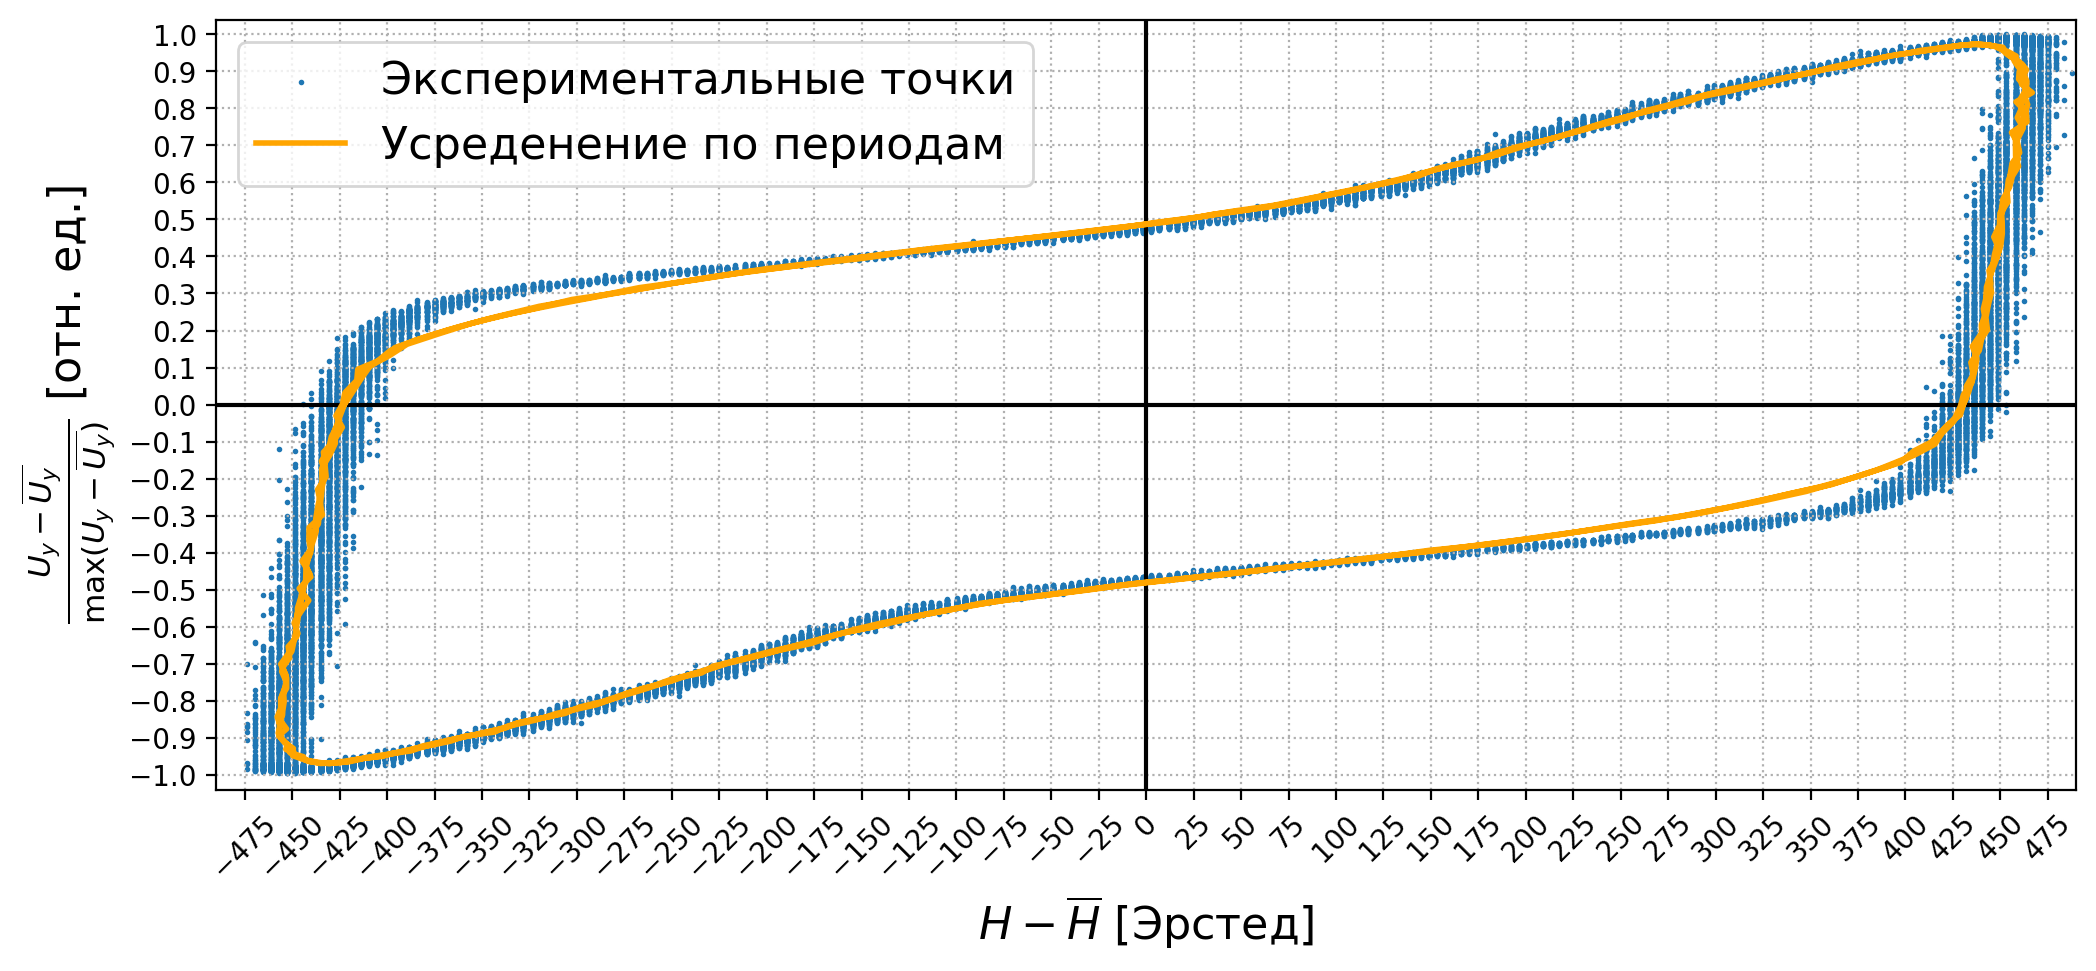

In [6]:
plt.figure(figsize=(12, 5), dpi = 200)

plt.scatter(H, 
            y_normallized,
            s = 1,
            label = 'Экспериментальные точки')

plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.xticks(np.arange(-900, 900, 25), rotation = 45)
plt.xlim(-490, 490)
plt.yticks(np.arange(-1, 1.2, 0.1))
plt.ylim(-1.04, 1.04)
plt.grid(ls = ':')
plt.plot(x_mean_by_cycles, y_mean_by_cycles, color = 'orange', linewidth = 2, label = 'Усреденение по периодам')
plt.ylabel(r"$\frac{U_{y} - \overline{U_{y}}}{\operatorname{max}(U_{y} - \overline{U_{y}})}$ [отн. ед.]", fontsize = 16)
plt.xlabel(r"$H - \overline{H}$ [Эрстед]", fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper left')

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3038/2316079453.py:16: SyntaxWarning: invalid escape sequence '\m'
  label = f'Метод максимального правдоподобия\n$\mu = {param[1]:.2f}$ $3\sigma = {3 * param[0]:.2f}$')
/tmp/ipykernel_3038/2316079453.py:16: SyntaxWarning: invalid escape sequence '\s'
  label = f'Метод максимального правдоподобия\n$\mu = {param[1]:.2f}$ $3\sigma = {3 * param[0]:.2f}$')


250
(8.632711169289477, 427.9949731231363)


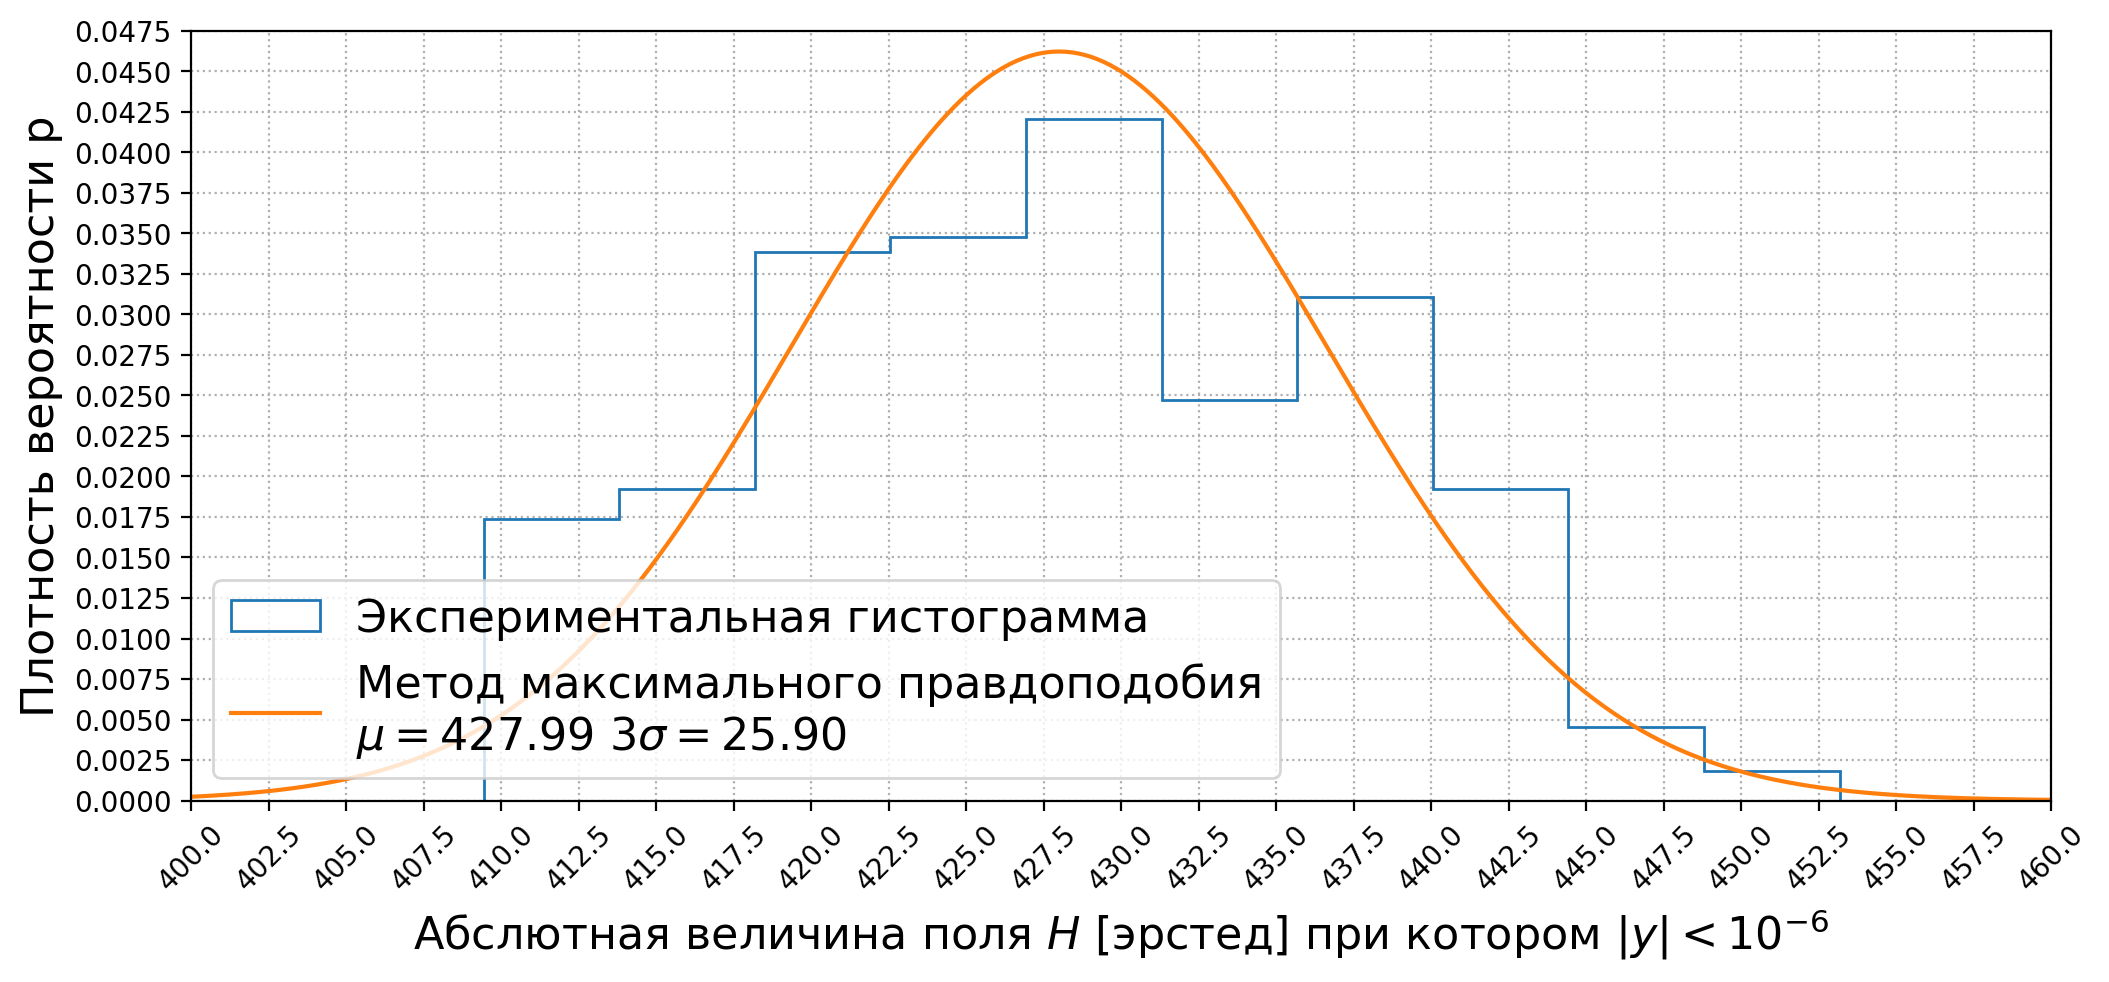

In [80]:
mask_y_is_zero = (np.abs(y_normallized) < 1e-2) 
plt.figure(figsize = (12, 5), dpi = 200)
print(sum(mask_y_is_zero))
param = sts.norm.fit(H[mask_y_is_zero])
normal_fitted = sts.norm(loc = param[1], scale = param[0])
print(param)
plt.hist(abs(H[mask_y_is_zero]), 
         bins = 10, 
         density=True,
         histtype='step',
         label = 'Экспериментальная гистограмма')
x_line = np.linspace(400, 500,
                     1000) 
plt.plot(x_line, 
         normal_fitted.pdf(x_line), 
         label = f'Метод максимального правдоподобия\n$\mu = {param[1]:.2f}$ $3\sigma = {3 * param[0]:.2f}$')
plt.xlabel("Абслютная величина поля $H$ [эрстед] при котором $|y| < 10^{-6}$", fontsize = 16)
plt.ylabel("Плотность вероятности p", fontsize = 16)
plt.legend(fontsize = 16, loc = 'lower left')
plt.xticks(np.arange(300, 500, 2.5), rotation = 45)
plt.xlim(400, 460)
plt.yticks(np.arange(0, 0.055, 0.0025))
plt.ylim(0, 0.0475)
plt.grid(ls = ':')

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3038/2004758729.py:16: SyntaxWarning: invalid escape sequence '\m'
  label = f'Метод максимального правдоподобия\n$\mu = {param[0]:.2f}$ $3\sigma = {3 * param[1]:.2f}$')
/tmp/ipykernel_3038/2004758729.py:16: SyntaxWarning: invalid escape sequence '\s'
  label = f'Метод максимального правдоподобия\n$\mu = {param[0]:.2f}$ $3\sigma = {3 * param[1]:.2f}$')


408
(352.8696090903392, 289.8931561347385)


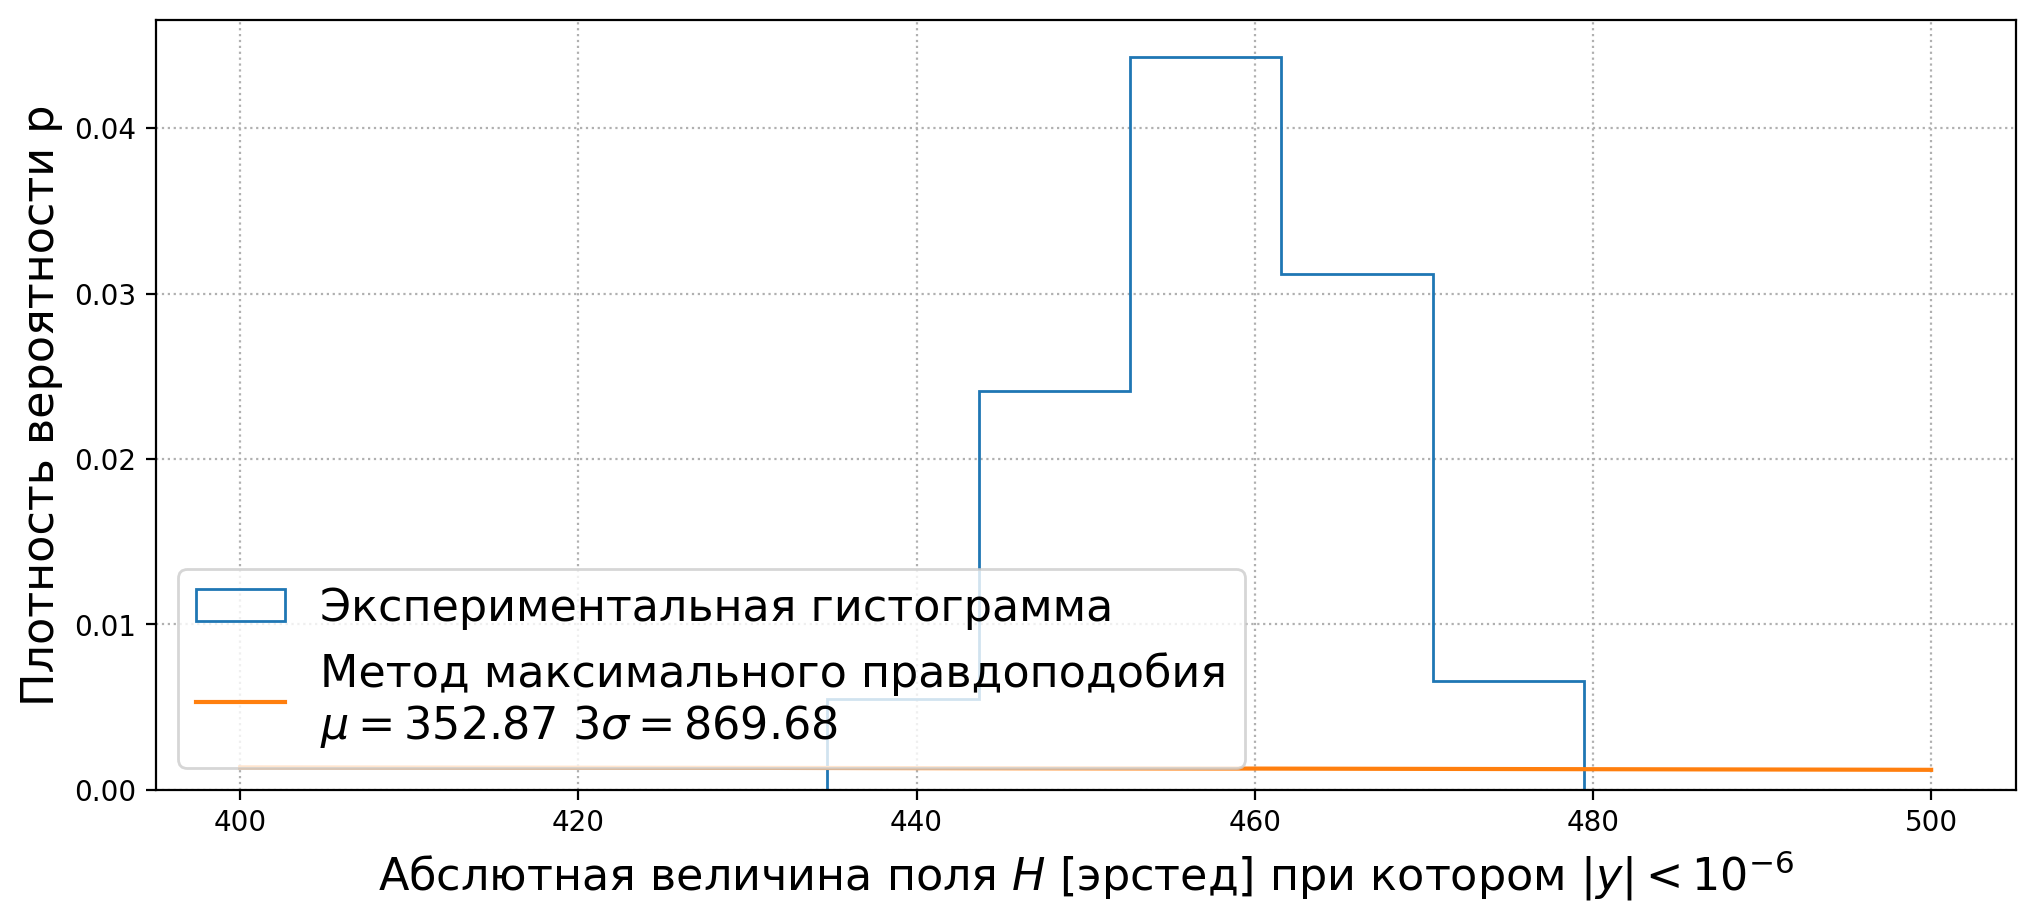

In [99]:
mask_y_is_zero = (np.abs(np.abs(y_normallized) - 1) < 1e-2) 
plt.figure(figsize = (12, 5), dpi = 200)
print(sum(mask_y_is_zero))
param = sts.norm.fit(H[mask_y_is_zero])
normal_fitted = sts.norm(loc = param[0], scale = param[1])
print(param)
plt.hist(abs(H[mask_y_is_zero]), 
         bins = 5, 
         density=True,
         histtype='step',
         label = 'Экспериментальная гистограмма')
x_line = np.linspace(400, 500,
                      1000) 
plt.plot(x_line, 
          normal_fitted.pdf(x_line), 
          label = f'Метод максимального правдоподобия\n$\mu = {param[0]:.2f}$ $3\sigma = {3 * param[1]:.2f}$')
plt.xlabel("Абслютная величина поля $H$ [эрстед] при котором $|y| < 10^{-6}$", fontsize = 16)
plt.ylabel("Плотность вероятности p", fontsize = 16)
plt.legend(fontsize = 16, loc = 'lower left')
# plt.xticks(np.arange(300, 500, 2.5), rotation = 45)
# plt.xlim(400, 460)
# plt.yticks(np.arange(0, 0.055, 0.0025))
# plt.ylim(0, 0.0475)
plt.grid(ls = ':')